In [20]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 26 12:31:23 2016

@author: vonw
"""

%matplotlib nbagg

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from numpy           import array, max, append, mean, ones
from matplotlib.mlab import find
from netCDF4         import Dataset
from datetime        import datetime, timedelta

# Latitude and Longitude for Pullman, WA
#dlat = 46.74377
#dlon = 360. - 117.11579
# Latitude and Longitude for Sacramento, CA
#dlat = 38.50694
#dlon = 360. - 121.495
# Latitude and Longitude for Boise, ID
dlat = 43.56704
dlon = 360. - 116.24053

# List of CMIP5 models to read.

In [21]:

models = ['BNU-ESM','CNRM-CM5','CSIRO-Mk3-6-0','bcc-csm1-1','CanESM2','GFDL-ESM2G','GFDL-ESM2M','MIROC5','MIROC-ESM','MIROC-ESM-CHEM','IPSL-CM5A-LR','IPSL-CM5A-MR','IPSL-CM5B-LR','NorESM1-M']
# models = ['BNU-ESM','CNRM-CM5','CSIRO-Mk3-6-0']   # for testing...

In [22]:


maca = pd.DataFrame({})  # Initialize a pandas DataFrame.
#   ....The two Hadley Centre models only have 360 days in a year, so I didn't use them here.
for model in models:
    print('Processing: ' + model)
    fn1 = 'http://thredds-dev.nkn.uidaho.edu:8080/thredds/dodsC/agg_macav2metdata_pr_' + model + '_r1i1p1_historical_1950_2005_CONUS_daily.nc';
    fn2 = 'http://thredds-dev.nkn.uidaho.edu:8080/thredds/dodsC/agg_macav2metdata_pr_' + model + '_r1i1p1_rcp85_2006_2099_CONUS_daily.nc';

    f1  = Dataset(fn1);
    f2  = Dataset(fn2);
    
    lat = f1.variables['lat'][:];
    lon = f1.variables['lon'][:];
    # Find the lat/lon pixel that contains the desired location
    #   THIS IS JUST APPROXIMATE FOR NOW.
    ilat = max(find(lat<dlat))
    ilon = max(find(lon<dlon))
    # Create a time vector.
    days = append(f1.variables['time'][:], f2.variables['time'][:])
    time = array([timedelta(int(day))+datetime(1900,1,1) for day in days])
    # Creater a precip vector.
    precip = array(append(f1.variables['precipitation'][:,ilat,ilon], f2.variables['precipitation'][:,ilat,ilon]))
    
    # add a new column to the DataFrame for each model.
    maca[model] = pd.Series(precip, index=time)

    f1.close()
    f2.close()


Processing: BNU-ESM
Processing: CNRM-CM5
Processing: CSIRO-Mk3-6-0
Processing: bcc-csm1-1
Processing: CanESM2
Processing: GFDL-ESM2G
Processing: GFDL-ESM2M
Processing: MIROC5
Processing: MIROC-ESM
Processing: MIROC-ESM-CHEM
Processing: IPSL-CM5A-LR
Processing: IPSL-CM5A-MR
Processing: IPSL-CM5B-LR
Processing: NorESM1-M


In [23]:
# Calculate anomalies.
Phist   = maca['1970-1-1':'1999-12-31'].mean().mean()
P2030s  = maca['2030-1-1':'2039-12-31'].mean()
P2050s  = maca['2050-1-1':'2059-12-31'].mean()
anomaly = [P2030s-Phist, P2050s-Phist]

[None, None, None, None]

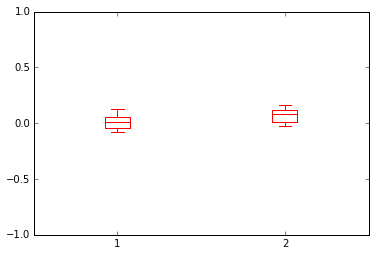

In [24]:
# Create boxplot of anomalies.
fig, ax1 = plt.subplots()

bp = plt.boxplot(anomaly)
plt.axis([0.5, 2.5, -1., 1.])
plt.setp(bp['boxes'], color='red')
plt.setp(bp['whiskers'], color='red',linestyle='-')
plt.setp(bp['caps'], color='red')

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  backgroundcolor: any matplotlib color         
  bbox: rectangle prop dict         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color: any matplotlib color         
  contains: a callable function         
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' |                   'monospace' ]         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance         
  gid: an id string         
  horizontalalignment or ha: [ 'center' | 'rig

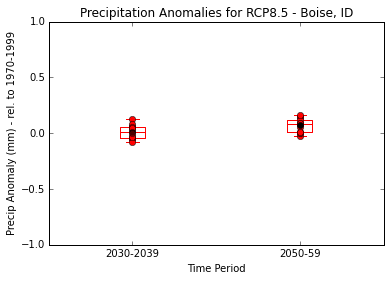

In [25]:


# Create boxplot of anomalies.
fig1, ax1 = plt.subplots()

bp = plt.boxplot(anomaly)
plt.axis([0.5, 2.5, -1., 1.])
plt.setp(bp['boxes'], color='red')
plt.setp(bp['whiskers'], color='red',linestyle='-')
plt.setp(bp['caps'], color='red')

plt.plot(ones(anomaly[0].size),anomaly[0],'ro')
plt.plot(1, mean(anomaly[0]),'ko',alpha=0.7)
plt.plot(ones(anomaly[1].size)*2,anomaly[1],'ro')
plt.plot(2, mean(anomaly[1]),'ko')

plt.setp(plt.setp(ax1, xticklabels=['2030-2039','2050-59']))
plt.xlabel('Time Period')
plt.ylabel('Precip Anomaly (mm) - rel. to 1970-1999')
plt.title('Precipitation Anomalies for RCP8.5 - Boise, ID')

plt.savefig('precip_RCP85_Boise.png')

